In [3]:
import json
import os

# Define the base directory for the problem files
problem_dir = "math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/correct_base_solution/problem_330"

# The directory containing the solution file
chunk_dir = "chunk_0"
# The name of the solution file
chunk_filename = "solutions.json"

# Construct the full path to the solutions.json file
chunk_path = os.path.join(problem_dir, chunk_dir, chunk_filename)

try:
    with open(chunk_path, 'r') as f:
        # Load the JSON content from the file
        chunk_data = json.load(f)

    print(f"Content of {chunk_filename}:")
    # Pretty-print the JSON object for better readability
    print(json.dumps(chunk_data, indent=2))

except FileNotFoundError:
    print(f"Error: The file {chunk_path} was not found.")
except json.JSONDecodeError:
    print(f"Error: The file {chunk_path} is not a valid JSON file.")

Content of solutions.json:
[
  {
    "chunk_removed": "Alright, so I've got this math problem here that I need to solve.",
    "prefix_without_chunk": "",
    "chunk_resampled": "Alright, so I've got this math problem here: Compute this big expression with a bunch of nested parentheses.",
    "rollout": "Alright, so I've got this math problem here: Compute this big expression with a bunch of nested parentheses. It looks pretty complicated at first glance, but maybe if I break it down step by step, it'll make more sense. Let me write it out to visualize it better:\n\n3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3)))))))))\n\nHmm, okay, so it's a series of nested multiplications and additions. It seems like each layer is multiplying 3 by something, and that something is 1 plus another set of 3 multiplied by something else. It's kind of a recursive structure, isn't it? Maybe I can solve it by starting from the innermost parentheses and working my way outwards. That usually helps 

In [4]:
import torch.nn as nn

In [5]:
chunk_data

[{'chunk_removed': "Alright, so I've got this math problem here that I need to solve.",
  'prefix_without_chunk': '',
  'chunk_resampled': "Alright, so I've got this math problem here: Compute this big expression with a bunch of nested parentheses.",
  'rollout': "Alright, so I've got this math problem here: Compute this big expression with a bunch of nested parentheses. It looks pretty complicated at first glance, but maybe if I break it down step by step, it'll make more sense. Let me write it out to visualize it better:\n\n3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3)))))))))\n\nHmm, okay, so it's a series of nested multiplications and additions. It seems like each layer is multiplying 3 by something, and that something is 1 plus another set of 3 multiplied by something else. It's kind of a recursive structure, isn't it? Maybe I can solve it by starting from the innermost parentheses and working my way outwards. That usually helps with nested expressions.\n\nLet me label 

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig, AutoModelForCausalLM, pipeline

import torch


model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B" # Or any other suitable model

mname = model_name

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Important: Add a pad token if the tokenizer doesn't have one, especially for decoder models.

if tokenizer.pad_token is None:

    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Load the model with `output_attentions=True`
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)


The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Loading checkpoint shards: 100%|██████████| 2/2 [00:32<00:00, 16.20s/it]


In [8]:
input_text = chunk_data[0]['full_cot']

In [9]:
# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt")

# Pass the inputs to the model
# The output will include a tuple of attention weights, one for each layer
outputs = model(**inputs, output_attentions=True)

In [11]:
outputs

CausalLMOutputWithPast(loss=None, logits=tensor([[[ 1.1601,  2.0860,  4.8631,  ..., -1.1549, -1.1549, -1.1549],
         [ 5.7906,  3.9885,  3.9331,  ..., -0.0954, -0.0956, -0.0951],
         [ 8.6254, -0.8689, -0.5310,  ..., -5.0483, -5.0480, -5.0487],
         ...,
         [ 5.8339,  4.6311,  3.5260,  ..., -3.1645, -3.1647, -3.1646],
         [ 9.4398, -0.1480,  3.8116,  ..., -0.9852, -0.9853, -0.9851],
         [ 7.0862,  7.2074,  3.2634,  ..., -4.7104, -4.7102, -4.7102]]],
       grad_fn=<UnsafeViewBackward0>), past_key_values=DynamicCache(layers=[<transformers.cache_utils.DynamicLayer object at 0x72ac943bcd70>, <transformers.cache_utils.DynamicLayer object at 0x72ad72e423f0>, <transformers.cache_utils.DynamicLayer object at 0x72ac8fd8ffe0>, <transformers.cache_utils.DynamicLayer object at 0x72acd65d62a0>, <transformers.cache_utils.DynamicLayer object at 0x72ac92f5c1a0>, <transformers.cache_utils.DynamicLayer object at 0x72ac911ef350>, <transformers.cache_utils.DynamicLayer object

In [10]:
attention_weights = outputs.attentions

# Print the shape of the attention weights for each layer
print("Attention weights shape for each layer:")
for i, layer_attentions in enumerate(attention_weights):
    print(f"Layer {i}: {layer_attentions.shape}")

Attention weights shape for each layer:
Layer 0: torch.Size([1, 32, 2307, 2307])
Layer 1: torch.Size([1, 32, 2307, 2307])
Layer 2: torch.Size([1, 32, 2307, 2307])
Layer 3: torch.Size([1, 32, 2307, 2307])
Layer 4: torch.Size([1, 32, 2307, 2307])
Layer 5: torch.Size([1, 32, 2307, 2307])
Layer 6: torch.Size([1, 32, 2307, 2307])
Layer 7: torch.Size([1, 32, 2307, 2307])
Layer 8: torch.Size([1, 32, 2307, 2307])
Layer 9: torch.Size([1, 32, 2307, 2307])
Layer 10: torch.Size([1, 32, 2307, 2307])
Layer 11: torch.Size([1, 32, 2307, 2307])
Layer 12: torch.Size([1, 32, 2307, 2307])
Layer 13: torch.Size([1, 32, 2307, 2307])
Layer 14: torch.Size([1, 32, 2307, 2307])
Layer 15: torch.Size([1, 32, 2307, 2307])
Layer 16: torch.Size([1, 32, 2307, 2307])
Layer 17: torch.Size([1, 32, 2307, 2307])
Layer 18: torch.Size([1, 32, 2307, 2307])
Layer 19: torch.Size([1, 32, 2307, 2307])
Layer 20: torch.Size([1, 32, 2307, 2307])
Layer 21: torch.Size([1, 32, 2307, 2307])
Layer 22: torch.Size([1, 32, 2307, 2307])
Laye

In [ ]:
# check real attention scores
for layer in range(32):
    layer_attention = attention_weights[layer]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    for head in range(32):
        # Get the specific head's attention matrix and detach from the graph
        head_attention = attention_pattern[head].detach().numpy()
        sum_attention = head_attention.sum(axis=(1))
        print(f"Layer {layer}, Head {head}: {sum_attention}")


In [ ]:
attention_weights = outputs.attentions

# Print the shape of the attention weights for each layer
print("Attention weights shape for each layer:")
for i, layer_attentions in enumerate(attention_weights):
    print(f"Layer {i}: {layer_attentions.where()}")

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

In [13]:

import math


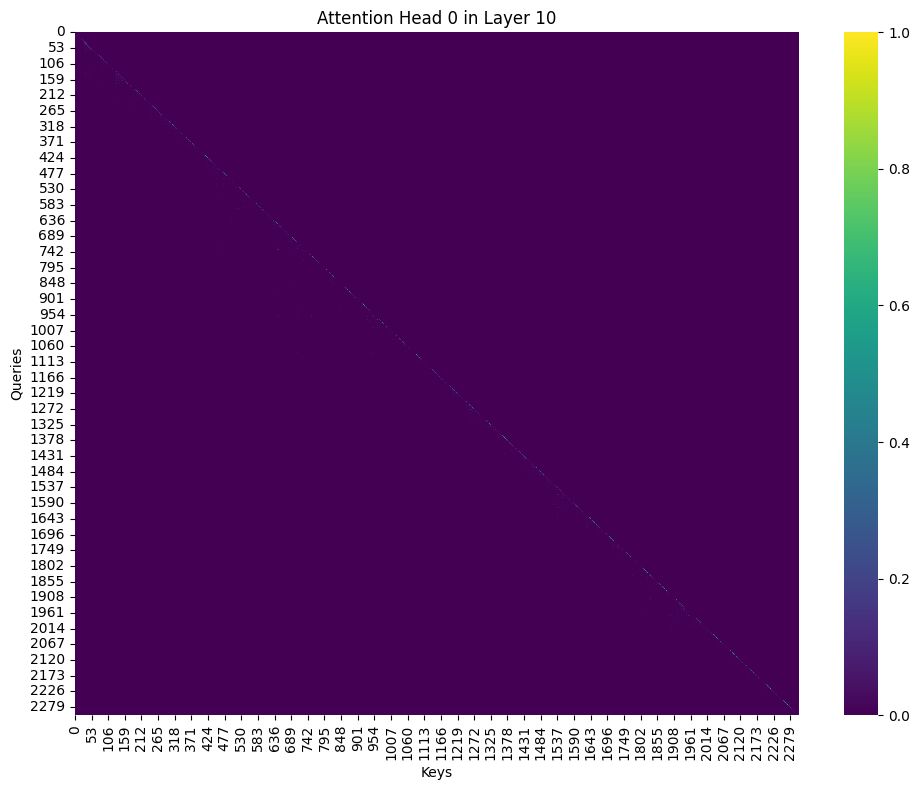

In [14]:
# Define the layer and head you want to visualize
layer_index = 10
head_index = 0

# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")

In [1]:
import numpy as np

In [17]:

def get_vertical_scores(
    avg_mat: np.ndarray,
    proximity_ignore: int = 20,
    control_depth: bool = True,
    score_type: str = "mean",
) -> np.ndarray:
    """
    Calculate vertical attention scores from an averaged attention matrix.
    """
    n = avg_mat.shape[0]
    trius = np.triu_indices_from(avg_mat, k=1)
    avg_mat = avg_mat.copy()
    avg_mat[trius] = np.nan
    trils = np.triu_indices_from(avg_mat, k=-proximity_ignore + 1)
    avg_mat[trils] = np.nan

    if control_depth:
        per_row = np.sum(~np.isnan(avg_mat), axis=1)
        avg_mat = stats.rankdata(avg_mat, axis=1, nan_policy="omit") / per_row[:, None]

    n = avg_mat.shape[-1]
    vert_scores = []
    for i in range(n):
        vert_lines = avg_mat[i + proximity_ignore :, i]
        if score_type == "mean":
            vert_score = np.nanmean(vert_lines)
        elif score_type == "median":
            vert_score = np.nanmedian(vert_lines)
        else:
            raise ValueError(f"Unknown score_type: {score_type}")
        vert_scores.append(vert_score)
    return np.array(vert_scores)


In [18]:
all_layer_head_scores = []
for layer, layer_attn in enumerate(attention_weights):
    layer_scores = []
    for head in range(layer_attn.shape[1]):
        avg_mat = layer_attn[0, head].detach().cpu().numpy()
        vert_scores = get_vertical_scores(avg_mat, proximity_ignore=4, control_depth=False, score_type="mean")
        layer_scores.append(vert_scores)
    all_layer_head_scores.append(layer_scores)
all_layer_head_scores = np.array(all_layer_head_scores)  # shape: [num_layers, num_heads, seq_len - proximity_ignore]

print(all_layer_head_scores.shape)

/tmp/ipykernel_3474829/1357523606.py:26: RuntimeWarning: Mean of empty slice
  vert_score = np.nanmean(vert_lines)


(32, 32, 2307)


In [ ]:
all_layer_head_scores[:, :, 0]

In [ ]:
!pip install scipy

In [19]:
from scipy import stats
def get_3d_ar_kurtosis(layer_head_vert_scores: np.ndarray) -> np.ndarray:
    layer_head_kurts = stats.kurtosis(
        layer_head_vert_scores, axis=2, fisher=True, bias=True, nan_policy="omit"
    )  # NaNs from the proximity ignorance
    return layer_head_kurts

# Compute kurtosis for all [layer][head] using vertical scores
layer_head_kurtosis = get_3d_ar_kurtosis(all_layer_head_scores)
print('Kurtosis shape:', layer_head_kurtosis.shape)
print(layer_head_kurtosis)

Kurtosis shape: (32, 32)
[[ 277.48787077  610.705061   1976.32104356 ... 2285.04163611
  2289.34751928 2292.93887342]
 [2245.04464836 2295.76394601 2297.34343848 ... 2220.30893393
  2293.27481115 2293.96094991]
 [2289.45433669 2297.60468244 2294.59839541 ... 2293.65601816
  2290.22481996 2292.73493791]
 ...
 [2297.54049524 2297.32508864 2297.61494398 ... 2291.6321574
  2259.9495744  2293.07454217]
 [2169.08030126 2271.21970532 2270.68662015 ... 2293.91570215
  2291.48125721 1876.61797174]
 [2283.14389068 2289.8129307  2263.77097592 ... 2274.393036
  2292.88151585 1766.36623105]]


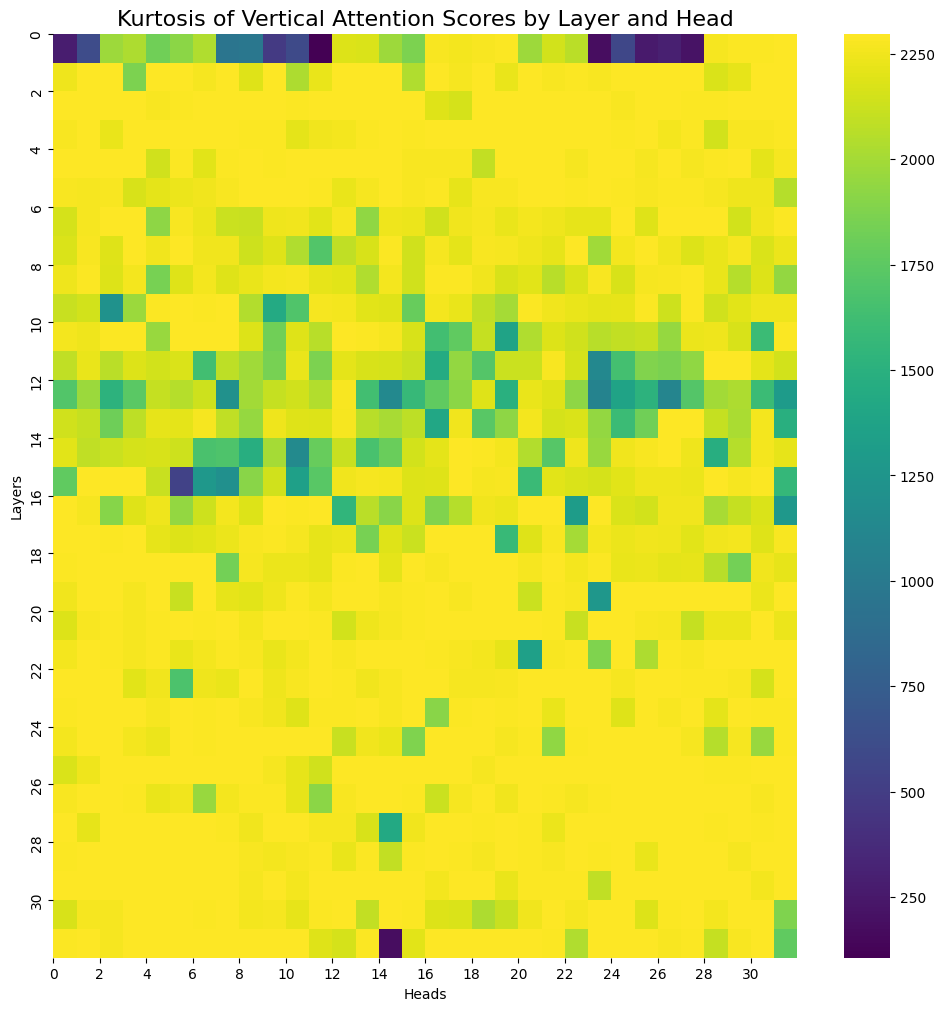

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(layer_head_kurtosis, cmap='viridis', annot=False, fmt=".2f")
plt.title('Kurtosis of Vertical Attention Scores by Layer and Head', fontsize=16)
plt.xlabel('Heads')
plt.ylabel('Layers')
plt.xticks(np.arange(0, 32, 2), np.arange(0, 32, 2))
plt.yticks(np.arange(0, 32, 2), np.arange(0, 32, 2))
plt.show()

In [ ]:
#goes through entire chunk

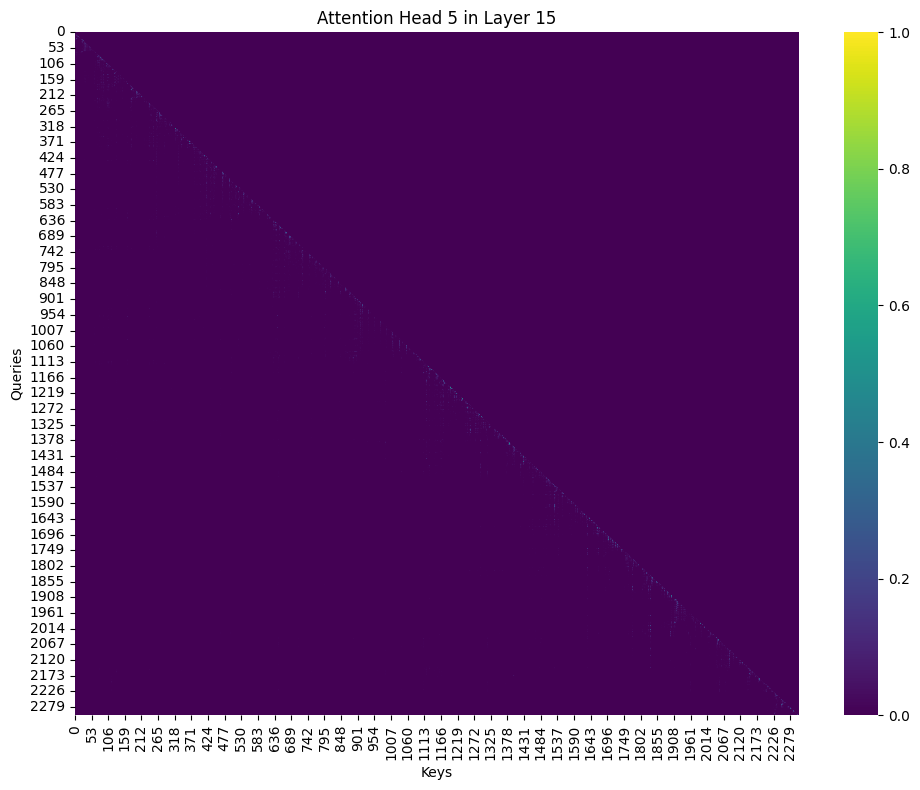

In [15]:
# Define the layer and head you want to visualize
layer_index = 15
head_index = 5
# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")

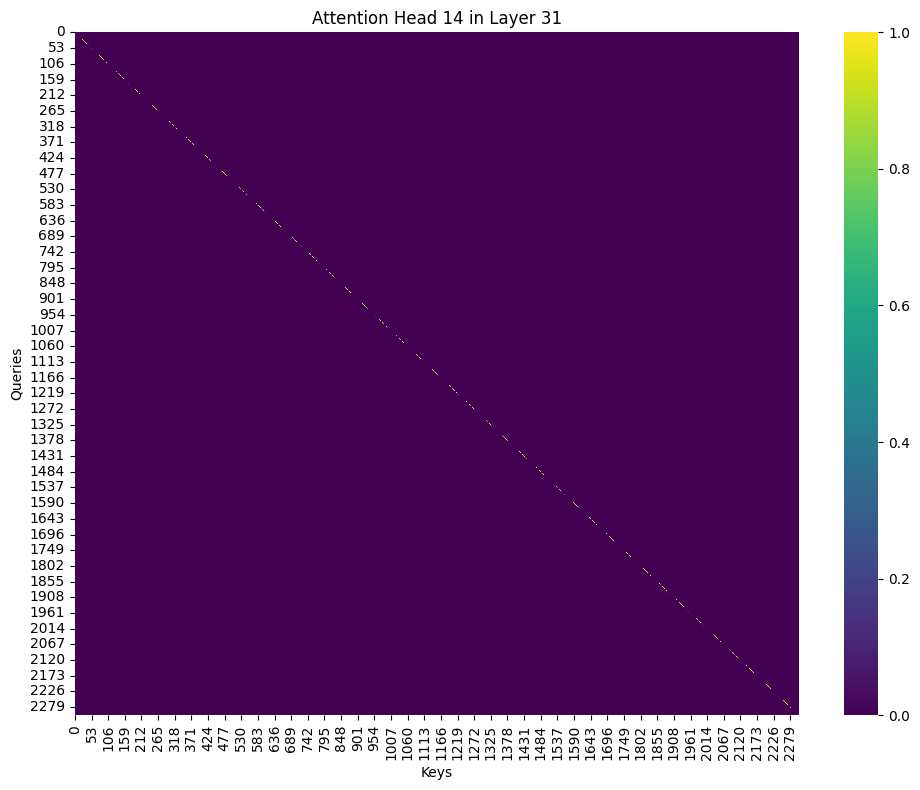

In [16]:
# Define the layer and head you want to visualize
layer_index = 31
head_index = 14
# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")

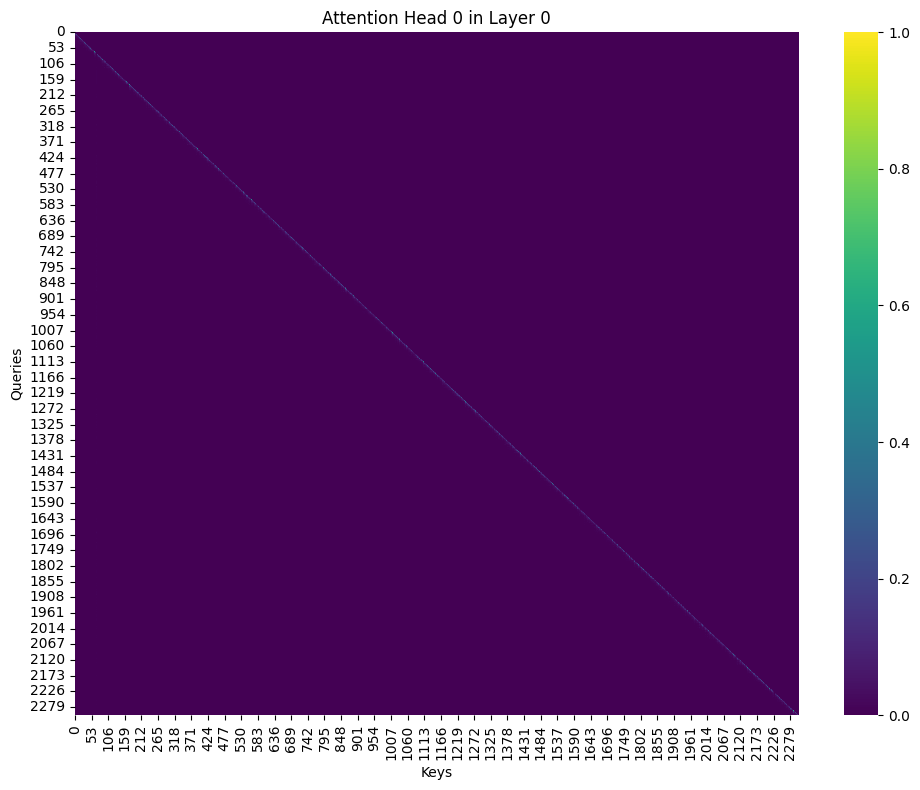

In [21]:
# Define the layer and head you want to visualize
layer_index = 0
head_index = 0
# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")

In [23]:
import copy

In [24]:
ablated_model = copy.deepcopy(model)
layer_index_to_ablate = 31
head_index_to_ablate = 14

def ablate_attention_hook(module, input, output):
    """
    Forward hook to ablate a specific attention head's output.

    Args:
        module (nn.Module): The module to which the hook is attached.
        input (tuple): The input to the module.
        output (torch.Tensor): The output of the module.
    """
    # The output of the attention layer is typically a tuple. The first element is the
    # tensor containing the combined head outputs.
    attention_output = output[0]

    # Get the dimensions of the attention output tensor
    batch_size, sequence_length, hidden_dim = attention_output.shape

    # Find the size of each head's output dimension
    # It's hidden_dim / num_heads. This needs to be calculated from the model config.
    num_heads = module.num_heads
    head_dim = hidden_dim // num_heads

    # Reshape the output to separate heads
    # The shape becomes (batch_size, sequence_length, num_heads, head_dim)
    reshaped_output = attention_output.view(batch_size, sequence_length, num_heads, head_dim)

    # Abiate the specified head by setting its values to zero
    # Use torch.zeros_like to maintain the correct data type and device
    reshaped_output[:, :, head_index_to_ablate, :] = torch.zeros_like(
        reshaped_output[:, :, head_index_to_ablate, :]
    )

    # Reshape the tensor back to its original shape
    # This prepares it for the next module in the network
    modified_output = reshaped_output.view(batch_size, sequence_length, hidden_dim)

    # Return the modified output. It must be returned as a tuple to match the original output format.
    return (modified_output,) + output[1:]

# --- Register the hook on the specific attention layer ---
# We need to find the correct module. In most transformer models, the attention modules are
# located within the decoder layers.
# The structure is often model.base_model.layers[layer_index].self_attn
# Let's verify the structure for the DeepSeek-R1-Distill-Llama-8B model
attention_layer = ablated_model.model.layers[layer_index_to_ablate].self_attn

# Register the hook. The hook will now be triggered on every forward pass of this module.
attention_layer.register_forward_hook(ablate_attention_hook)

# --- Tokenize the input text ---
inputs = tokenizer(input_text, return_tensors="pt")

# --- Generate text with the original and ablated models ---
# The original model will generate text normally
original_output = model.generate(
    **inputs,
    max_new_tokens=20,
    do_sample=False,
    pad_token_id=tokenizer.eos_token_id
)
original_text = tokenizer.decode(original_output[0], skip_special_tokens=True)

# The ablated model's specified head output will be zeroed out
ablated_output = ablated_model.generate(
    **inputs,
    max_new_tokens=20,
    do_sample=False,
    pad_token_id=tokenizer.eos_token_id
)
ablated_text = tokenizer.decode(ablated_output[0], skip_special_tokens=True)

# --- Print the results for comparison ---
print("=" * 50)
print(f"Original Text:")
print(original_text)
print("-" * 50)
print(f"Ablated Text (Layer {layer_index_to_ablate}, Head {head_index_to_ablate}):")
print(ablated_text)
print("=" * 50)


: 